In [1]:
import numpy as np # Numerical Python for computations
import pandas as pd # Pandas for data wrangling 
import re # For data preprocessing
import nltk # For data preprocessingvbv 
import bs4 # For scrapping the data
from nltk.corpus import stopwords # Data cleaing
from wordcloud import WordCloud # Data visialization
from nltk.stem.porter import PorterStemmer # Data cleaning
import requests # Web scrapping 
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
from sklearn.metrics import roc_curve, auc # Model Metrics
from sklearn.metrics import confusion_matrix, roc_curve, precision_score, recall_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier # Classification Model 
from sklearn.linear_model import LogisticRegression # Classification Model
from  sklearn.svm import SVC # Classification Model
from sklearn.preprocessing import StandardScaler # Data Transformation
from sklearn.neighbors import KNeighborsClassifier # Classification Model

## **Scrapping logictech customer reviews from Turstpoint.com**

In [2]:
req1 = requests.get('https://www.trustpilot.com/review/www.logitech.com?languages=en&stars=4&stars=5')
soup1 = bs4.BeautifulSoup(req1.text, 'html5lib')
all_reviews = soup1.select('.review-content__text')
reviews1 = []
for i in all_reviews:
    reviews1.append(i.getText())
req2 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=2&stars=4&stars=5')
soup2 = bs4.BeautifulSoup(req2.text, 'html5lib')
all_reviews = soup2.select('.review-content__text')
reviews2 = []
for i in all_reviews:
    reviews2.append(i.getText())
req3 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=3&stars=4&stars=5')
soup3 = bs4.BeautifulSoup(req3.text, 'html5lib')
all_reviews = soup3.select('.review-content__text')
reviews3 = []
for i in all_reviews:
    reviews3.append(i.getText())
req4 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=4&stars=4&stars=5')
soup4 = bs4.BeautifulSoup(req4.text, 'html5lib')
all_reviews = soup4.select('.review-content__text')
reviews4 = []
for i in all_reviews:
    reviews4.append(i.getText())
req5 = requests.get('https://www.trustpilot.com/review/www.logitech.com?languages=en&stars=1&stars=2&stars=3')
soup5 = bs4.BeautifulSoup(req5.text, 'html5lib')
all_reviews = soup5.select('.review-content__text')
reviews5 = []
for i in all_reviews:
    reviews5.append(i.getText())
req6 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=2&stars=1&stars=2&stars=3')
soup6 = bs4.BeautifulSoup(req6.text, 'html5lib')
all_reviews = soup6.select('.review-content__text')
reviews6 = []
for i in all_reviews:
    reviews6.append(i.getText())
req7 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=3&stars=1&stars=2&stars=3')
soup7 = bs4.BeautifulSoup(req7.text, 'html5lib')
all_reviews = soup7.select('.review-content__text')
reviews7 = []
for i in all_reviews:
    reviews7.append(i.getText())
req8 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=4&stars=1&stars=2&stars=3')
soup8 = bs4.BeautifulSoup(req8.text, 'html5lib')
all_reviews = soup8.select('.review-content__text')
reviews8 = []
for i in all_reviews:
    reviews8.append(i.getText())
req9 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=5&stars=1&stars=2&stars=3')
soup9 = bs4.BeautifulSoup(req9.text, 'html5lib')
all_reviews = soup9.select('.review-content__text')
reviews9 = []
for i in all_reviews:
    reviews9.append(i.getText())
req10 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=6&stars=1&stars=2&stars=3')
soup10 = bs4.BeautifulSoup(req10.text, 'html5lib')
all_reviews = soup10.select('.review-content__text')
reviews10 = []
for i in all_reviews:
    reviews10.append(i.getText())
req11 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=7&stars=1&stars=2&stars=3')
soup11 = bs4.BeautifulSoup(req11.text, 'html5lib')
all_reviews = soup11.select('.review-content__text')
reviews11 = []
for i in all_reviews:
    reviews11.append(i.getText())
req12 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=8&stars=1&stars=2&stars=3')
soup12 = bs4.BeautifulSoup(req12.text, 'html5lib')
all_reviews = soup12.select('.review-content__text')
reviews12 = []
for i in all_reviews:
    reviews12.append(i.getText())
req13 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=9&stars=1&stars=2&stars=3')
soup13 = bs4.BeautifulSoup(req13.text, 'html5lib')
all_reviews = soup13.select('.review-content__text')
reviews13 = []
for i in all_reviews:
    reviews13.append(i.getText())
req14 = requests.get('https://www.trustpilot.com/review/www.logitech.com?page=10&stars=1&stars=2&stars=3')
soup14 = bs4.BeautifulSoup(req14.text, 'html5lib')
all_reviews = soup14.select('.review-content__text')
reviews14 = []
for i in all_reviews:
    reviews14.append(i.getText())



---
  ### All the reviews which has more than 3 stars are annotated as 1 considering them as positive reviews

---
  ### All the reviews which has less than 4 stars are annotated as 0 considering them as negative reviews



In [3]:
all_good_reviews = reviews1+reviews2+reviews3+reviews4
all_bad_reviews = reviews5+reviews6+reviews7+reviews8+reviews9+reviews10+reviews11+reviews12+reviews13+reviews14

In [4]:
all_good_reviews = pd.DataFrame(all_good_reviews)
all_bad_reviews = pd.DataFrame(all_bad_reviews)

In [5]:
all_good_reviews['Score'] = np.ones(all_good_reviews.shape).astype(int)
all_bad_reviews['Score'] = np.zeros(all_bad_reviews.shape).astype(int)

In [6]:
 all_good_reviews = all_good_reviews.rename(columns= {0:'Reviews'})
 all_bad_reviews = all_bad_reviews.rename(columns= {0:'Reviews'})   

In [7]:
All_reviews = pd.concat([all_bad_reviews, all_good_reviews], axis =0).sample(frac = 1).reset_index(drop = True)

In [8]:
All_reviews.head()

,Reviews,Score
0,\n I like logitech mouses.They ...,1
1,\n LOGITECH C270 Great webcam. ...,1
2,\n Ordering process really smoo...,1
3,"\n £130 down, no confirmation e...",0
4,\n never/ever buy from their of...,0


***# Knowing the data***

In [9]:
All_reviews.shape

(275, 2)

In [10]:
All_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  275 non-null    object
 1   Score    275 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


# ***Cleaning the text data to model understable format***

In [11]:
def text_cleaner(fulldf): 
    from nltk.stem import WordNetLemmatizer
    nltk.download('stopwords')
    nltk.download('wordnet')
    wordnet_lemmatizer = WordNetLemmatizer()
    corpus = []
    c = 0
    for i in range(0,fulldf.shape[0]):
        review = re.sub('^[a-zA-Z]','',fulldf['Reviews'][i]).lower().split()
        review = [re.sub('[,.]','',word) for word in review]
        review = [re.sub(r"what's", "what is", word) for word in review]
        review = [re.sub(r"shouldn't", "should not", word) for word in review]
        review = [re.sub(r"wouldn't", "would not", word) for word in review]
        review = [re.sub(r"couldn't", "could not", word) for word in review]
        review = [re.sub(r"can't", "can not", word) for word in review]
        review = [re.sub(r"that's", "that is", word) for word in review]
        review = [re.sub(r"won't", "will not", word) for word in review]
        review = [re.sub(r"\'ll", " will", word) for word in review]
        review = [re.sub(r"\'re'", " are", word) for word in review]
        review = [re.sub(r"\'ve", " have", word) for word in review]
        review = [re.sub(r"bout", "about", word) for word in review]
        review = [re.sub(r"nd", "and", word) for word in review]
        review = [re.sub(r"break- up", "break-up", word) for word in review]
        review = [re.sub(r"we're", "we are", word) for word in review]
        review = [re.sub(r"\'d'", "would", word) for word in review]
        review = [re.sub(r"[@!#$%^&*()_.']","", word) for word in review]
        review = [wordnet_lemmatizer.lemmatize(word, pos = 'v') for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [12]:
corpus = text_cleaner(All_reviews)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


The corpus list has the clean text

The re regular expression package is used to remove short hands and punctuations from the text

The regular grammatical words like is was the are removed using the stop words set

The porter stemmer finds the root words for the words

Like in the following example

In [13]:
All_reviews['Reviews'][0]

'\n                I like logitech mouses.They are easy to use,durable and cheaper than similar products.\n            '

In [14]:
corpus[0]

'like logitech mousesthey easy usedurable aand cheaper similar products'

In [15]:
All_reviews['Corpus'] = corpus

# Creating the bag of words model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [17]:
x = cv.fit_transform(corpus).toarray()

In [18]:
x.shape

(275, 2657)

In [19]:
y = All_reviews['Score']

# Checking how balanced the dataset is with respect to the Score

In [20]:
yes_vs_no_ratio = y.value_counts()*100/y.shape

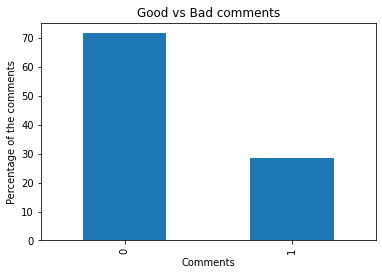

In [21]:
yes_vs_no_ratio.plot(kind = 'bar')
plt.title('Good vs Bad comments')
plt.xlabel("Comments")
plt.ylabel("Percentage of the comments")
plt.show()

### The train test split is not doing a good job in spling the number of positive and negative comment

### Spliting the test train and validated data


In [22]:
ml_df = pd.concat([pd.DataFrame(x),y, All_reviews['Corpus']], axis = 1).reset_index(drop = True)
positive_comments = ml_df[ml_df['Score']== 1]
negative_comments = ml_df[ml_df['Score'] == 0]

In [23]:
for i in [positive_comments, negative_comments]:
  print(i.shape)

(78, 2659)
(197, 2659)


In [89]:
train_data = pd.concat([positive_comments.iloc[:55,:], negative_comments.iloc[:170,:]], axis = 0).sample(frac = 1)

In [88]:
test_data =  pd.concat([positive_comments.iloc[55:,:], negative_comments.iloc[170:,:]], axis = 0).sample(frac = 1)

### Spliting the data into X suffixed independent and y suffixed dependent variable

In [53]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654,2655,2656,Score,Corpus
135,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,buy daughter 99 slim pro ipad cover 6 gen apri...
100,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,order g560 game speakers website say stock 10 ...
191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,didnt offer half star need add keep customer s...
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,logitech c270 great webcam useful smart work v...
74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,logitech seands wrong item order eanded refuan...


In [90]:
X_train = train_data.drop(['Score', 'Corpus'], axis =1)
y_train = train_data['Score']
X_test = test_data.drop(['Score', 'Corpus'], axis =1)
y_test = test_data['Score']


In [93]:
for i in [X_train,y_train,X_test,y_test]:
    print(i.shape)

(225, 2657)
(225,)
(50, 2657)
(50,)


#***Building the necessary functions***

In [94]:
# Confusion Matrix
def conf_m(cm):
    
    sns.heatmap(cm, annot= True)
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    plt.show()

In [95]:
# Ploting the ROC FOR THE MODELS
def Roc_visualizer(X,Y):
    sns.set('talk', 'whitegrid', 'dark', font_scale=1.0, font='Ricty',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
    
    fpr, tpr, missclassificcations = roc_curve(X, Y)
    roc_auc = auc(fpr, tpr)
    
    lw = 2
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

In [96]:
# Evaluation def
from sklearn.metrics import f1_score
def metrics(x, y):
    print(accuracy_score(x,y), "is the accuracy score of this model")
    print(precision_score(x,y), "is the precision of this model")
    print(recall_score(x,y), "is the recall score of this model")
    print(f1_score(x,y), "is the f1_score of the model")
    Roc_visualizer(x,y)

In [97]:
# Grid search 
def GCV(model,param_grid, csv, x, y, metric):
    grid_search = GridSearchCV(model,
                           param_grid = param_grid,
                           scoring = metric,
                           cv = csv,
                           n_jobs = -1)
    grid_search = grid_search.fit(x,y)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    return best_accuracy, best_parameters

# Logistic Regrssion Model

In [98]:
# Building the full model
lr = LogisticRegression(n_jobs= -1)
# Fitting the model
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
# Drawing predictions
preds =  lr.predict(X_test)

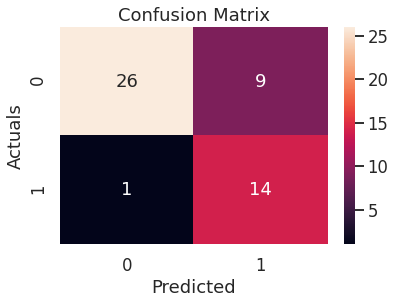

In [100]:
# Confusion Martri
conf_m(confusion_matrix(preds, y_test))

0.8 is the accuracy score of this model
0.9333333333333333 is the precision of this model
0.6086956521739131 is the recall score of this model
0.7368421052631579 is the f1_score of the model


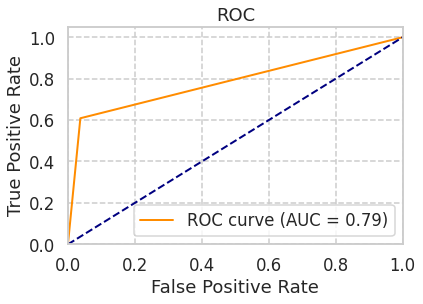

In [101]:
# Evaluating the model
metrics(y_test,preds)

In [102]:
# Building the SVM model

In [103]:
from  sklearn.svm import SVC
# I have not scaled this dataset because it is sparse dataset.
# Building the SVM full model
svc = SVC(C = 1, gamma= 0.3)
# Fitting the svm model 
svc.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [104]:
# Drawing predcitions
svm_preds = svc.predict(X_test)

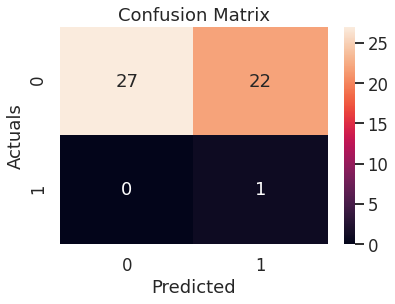

In [105]:
conf_m(confusion_matrix(svm_preds, y_test))

0.56 is the accuracy score of this model
1.0 is the precision of this model
0.043478260869565216 is the recall score of this model
0.08333333333333333 is the f1_score of the model


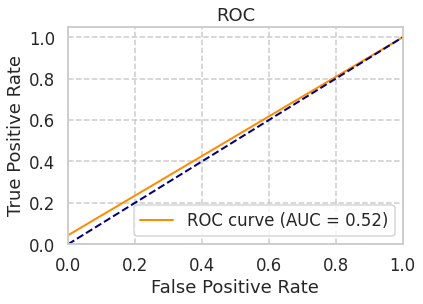

In [106]:
metrics(y_test, svm_preds)

In [44]:
best_accuracy, best_parameters = GCV(svc,parameters, 10,X_train, y_train, 'recall')  

NameError: ignored

# K Nearest Neighbours

In [107]:
# Building the K nearest neighbours model
kn = KNeighborsClassifier()
# Fitting the model
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [108]:
# Drawing Predictions
y_pred = kn.predict(X_test)

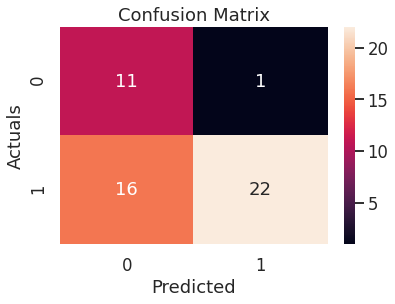

In [109]:
conf_m(confusion_matrix(y_pred, y_test))

0.66 is the accuracy score of this model
0.9565217391304348 is the precision of this model
0.5789473684210527 is the recall score of this model
0.721311475409836 is the f1_score of the model


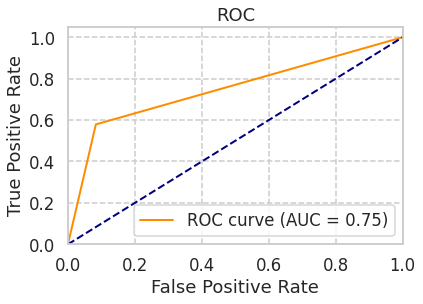

In [110]:
metrics(y_pred, y_test)

# Random forest model

In [111]:
# Building a full model with, entropy criterion
rf = RandomForestClassifier(criterion= 'entropy')
# fitting the full model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
# Drawing predictions
y_pred = rf.predict(X_test)

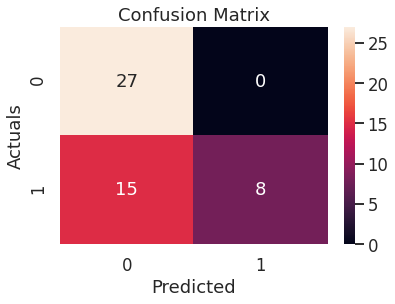

In [113]:
# Confusion Matrix
conf_m(confusion_matrix(y_test, y_pred))

0.7 is the accuracy score of this model
1.0 is the precision of this model
0.34782608695652173 is the recall score of this model
0.5161290322580645 is the f1_score of the model


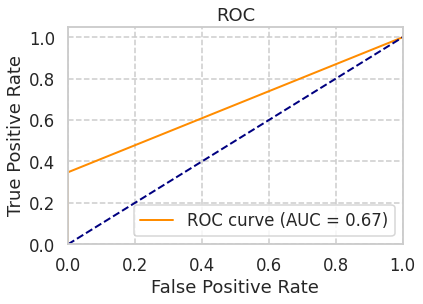

In [114]:
metrics(y_test, y_pred)

The RF model is not doing a very good job in predicting

# Let's try building an ANN model to classify the data before trying grid searchers

In [115]:
# ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [116]:
classifier = Sequential()

In [117]:
X_train.shape

(225, 2657)

In [128]:
classifier.add(Dense(units = 100, input_dim = 2657, kernel_initializer= 'glorot_normal', activation= 'relu'))
classifier.add(Dense(units = 80, kernel_initializer= 'glorot_normal', activation= 'relu'))
classifier.add(Dense(units = 5, kernel_initializer= 'glorot_normal', activation= 'relu'))
classifier.add(Dense(units= 1, kernel_initializer='glorot_normal', activation= 'sigmoid'))
classifier.compile(optimizer='Adamax', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [129]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 100)               265800    
_________________________________________________________________
dense_51 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_52 (Dense)             (None, 18)                1458      
_________________________________________________________________
dense_53 (Dense)             (None, 5)                 95        
_________________________________________________________________
dense_54 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 6         
_________________________________________________________________
dense_56 (Dense)             (None, 100)              

In [130]:
classifier.fit(X_train, y_train, validation_split= 0.28, epochs= 200, batch_size= 64)

Epoch 1/200
3/3 [==============================] - 1s 164ms/step - loss: 0.6921 - accuracy: 0.8294 - val_loss: 0.6883 - val_accuracy: 0.7619
Epoch 2/200
3/3 [==============================] - 0s 26ms/step - loss: 0.6867 - accuracy: 0.9150 - val_loss: 0.6842 - val_accuracy: 0.7619
Epoch 3/200
3/3 [==============================] - 0s 26ms/step - loss: 0.6822 - accuracy: 0.8600 - val_loss: 0.6805 - val_accuracy: 0.7460
Epoch 4/200
3/3 [==============================] - 0s 25ms/step - loss: 0.6766 - accuracy: 0.7605 - val_loss: 0.6766 - val_accuracy: 0.7460
Epoch 5/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6711 - accuracy: 0.7624 - val_loss: 0.6723 - val_accuracy: 0.7460
Epoch 6/200
3/3 [==============================] - 0s 25ms/step - loss: 0.6670 - accuracy: 0.7429 - val_loss: 0.6680 - val_accuracy: 0.7460
Epoch 7/200
3/3 [==============================] - 0s 25ms/step - loss: 0.6606 - accuracy: 0.7546 - val_loss: 0.6639 - val_accuracy: 0.7460
Epoch 8/200
3/3 [==

In [131]:
preds = classifier.predict(X_test)

In [132]:
preds = (preds>0.5)

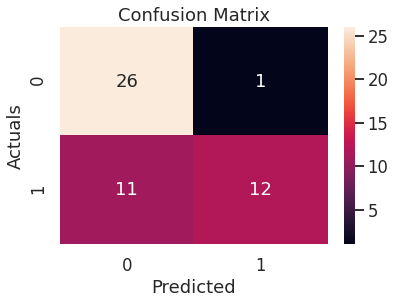

In [133]:
conf_m(confusion_matrix(y_test, preds))

0.76 is the accuracy score of this model
0.5217391304347826 is the precision of this model
0.9230769230769231 is the recall score of this model
0.6666666666666667 is the f1_score of the model


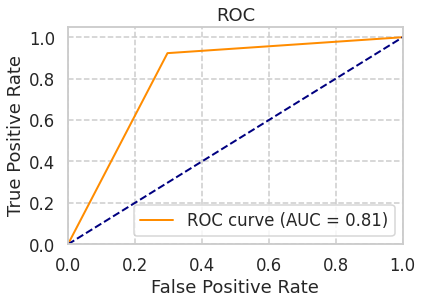

In [134]:
metrics(preds, y_test)

In [139]:
# Prescriptions from the model
test_data['Predictions'] = preds

In [151]:
# Word Cloud
wc = WordCloud(height = 800, width = 800,
                background_color='black',
               max_words = 50,
               stopwords = stopwords.words('english').append('logitech')
               )

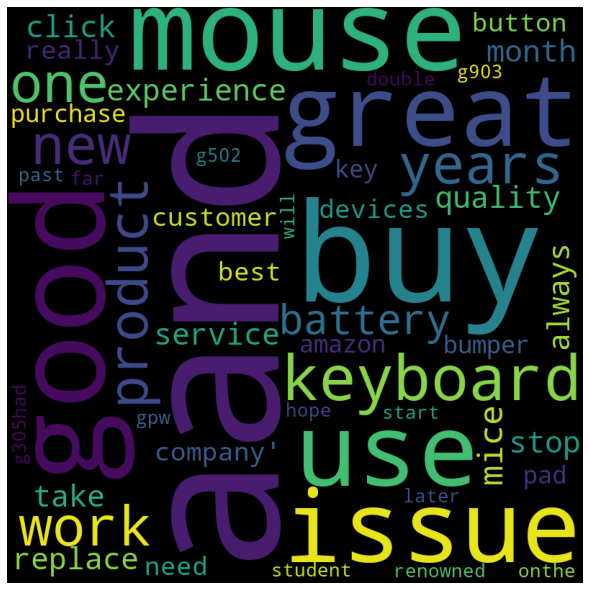

In [156]:
# Predicted true comments
test_data[test_data['Predictions'] == True]['Corpus']
# Building the wordcloud on the possitive comments
positive_comments_wordcld  = str([i for i in test_data[test_data['Predictions'] == True]['Corpus']]).replace('logitech','')
wc.generate(positive_comments_wordcld)

# PLoting
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

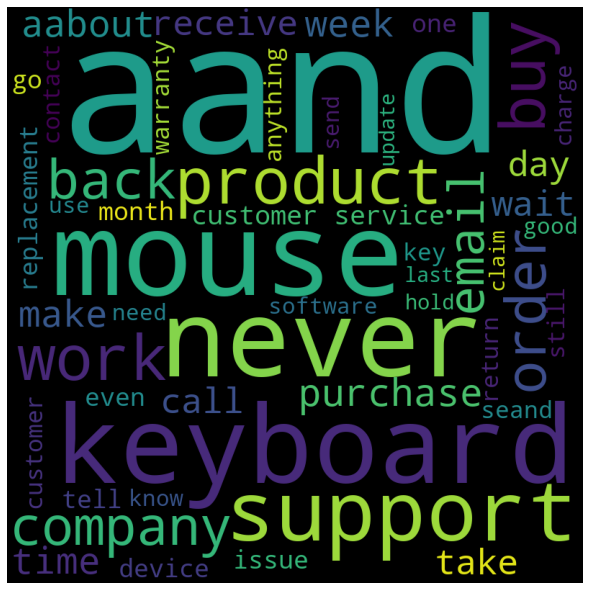

In [157]:
# Predicted False Comments
test_data[test_data['Predictions'] == False]['Corpus']
# Building the wordcloud on the negative comments
negative_comments_wordcld  = str([i for i in test_data[test_data['Predictions'] == False]['Corpus']]).replace('logitech','')
wc.generate(negative_comments_wordcld)
# PLoting
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 